# Survey Analysis: Figures

This notebook reproduces Figures 2, 3, and 4 in the paper.

In [0]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

import upsetplot as up

import evident.plot as evp

#NOTE: Proprietary Evidation Style. Delete the plt.style line when running; plots will have different styling, but the same content
plt.style.use('/FileStore/tables/eve.mplstyle')
plt.rcParams['patch.facecolor'] = 'white'
eve_turquoise = '#3abac5'

### Load datasets

Qualified researchers may download these datasets from Synapse: https://www.synapse.org/20192020ilisurveillanceprogram

In [0]:
#NOTE: UPDATE THIS CELL WITH THE APPROPRIATE PATHNAMES

#define pathnames of datasets
ili_events_path = '/data/covid19/manuscript_data_delivery_for_synapse/event-level_survey_data.csv.gz'
ili_days_path = '/data/covid19/manuscript_data_delivery_for_synapse/daily_symptom_survey_data.csv.gz'

In [0]:
#survey responses, where each row corresponds to a single ILI event (one ILI event per participant)
ili_events = pd.read_csv(ili_events_path)
ili_events.tail()

,user_id,cohort,valid_user__steps,valid_user__heart,valid_user__sleep,user_event_n_merged,date_onset_merged,date_recovery_merged,date_survey_concat,survey_id,is_overlapping_flu_event,diagnosed__flu,diagnosed__covid,symptoms__chills_shiver,symptoms__cough,symptoms__fatigue,symptoms__fever,symptoms__headache,symptoms__bodyache,symptoms__no_symptoms,symptoms__nasal,symptoms__other,symptoms__sneezing,symptoms__sore_throat,symptoms__sweats,symptoms__anosmia,symptoms__none,symptoms__chest_pain,symptoms__short_breath,medical__sought_attention,medical__sought_attention_where,medical__hospitalized,medical__medication,covid__told_to_quarantine,covid__behavior__large_gatherings,covid__behavior__air_travel,covid__behavior__social_distancing__did_not
6921,243b95793eee4540,Non-COVID-19 Flu,1.0,0.0,0.0,1.0,2020-04-06,2020-04-10,2020-04-10__2020-04-16,280161684,1.0,yes,no,NaN,cough,NaN,NaN,headache,NaN,NaN,nasal congestion or runny nose,NaN,sneezing,sore throat or itchy scratchy throat,sweats,NaN,none of the above,NaN,NaN,yes,primary care clinic e g family medicine intern...,no,yes,no,no,no,i did not practice social distancing in the la...
6922,131c39ea5d4e8f0e,Pre-COVID-19 Flu,0.0,0.0,0.0,1.0,2020-02-12,2020-03-04,2020-03-04,273462458,0.0,yes,NaN,chills or shivering,cough,feeling more tired than usual,fever or feeling feverish,headache,body muscle ache,NaN,nasal congestion or runny nose,NaN,sneezing,NaN,sweats,NaN,NaN,NaN,NaN,yes,urgent care facility,no,no,NaN,NaN,NaN,NaN
6923,61c200aad265d315,Non-COVID-19 Flu,1.0,1.0,1.0,1.0,2020-04-05,2020-04-19,2020-04-21__2020-04-14,280161684,1.0,yes,no,chills or shivering,cough,feeling more tired than usual,fever or feeling feverish,headache,body muscle ache,NaN,nasal congestion or runny nose,NaN,NaN,sore throat or itchy scratchy throat,sweats,NaN,none of the above,NaN,NaN,yes,primary care clinic e g family medicine intern...,no,no,yes,no,no,NaN
6924,7d9839d123a2cb2a,Pre-COVID-19 Flu,0.0,0.0,0.0,1.0,2020-01-22,2020-01-27,2020-01-28,273462458,0.0,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sore throat or itchy scratchy throat,NaN,NaN,NaN,NaN,NaN,yes,urgent care facility,yes,yes,NaN,NaN,NaN,NaN
6925,185840c0245922e3,Pre-COVID-19 Flu,0.0,0.0,0.0,1.0,2020-02-07,2020-02-14,2020-02-14,273462458,0.0,yes,NaN,chills or shivering,cough,feeling more tired than usual,fever or feeling feverish,headache,body muscle ache,NaN,nasal congestion or runny nose,Nausea,sneezing,sore throat or itchy scratchy throat,sweats,NaN,NaN,NaN,NaN,yes,urgent care facility,no,yes,NaN,NaN,NaN,NaN


In [0]:
#survey responses, where each row corresponds to a participant-day
ili_days = pd.read_csv(ili_days_path)
ili_days.tail()

,user_id,cohort,days_since_symptoms_onset,study_date,date_onset_merged,date_recovery_merged,date_survey_for_daily_symptoms,dif_survey_symptom,daily_bhvr__covid__behavior__social_distancing,daily_symp__anosmia,daily_symp__chest_pain,daily_symp__short_breath,daily_symp__fever,daily_symp__other,daily_symp__cough,daily_symp__nasal,daily_symp__sneezing,daily_symp__sore_throat,daily_symp__bodyache,daily_symp__chills_shiver,daily_symp__fatigue,daily_symp__headache,daily_symp__sweats
574853,5b94d1dddfcc7821,Pre-COVID-19 Flu,71.0,2020-04-24,2020-02-13,2020-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
574854,5b94d1dddfcc7821,Pre-COVID-19 Flu,72.0,2020-04-25,2020-02-13,2020-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
574855,5b94d1dddfcc7821,Pre-COVID-19 Flu,73.0,2020-04-26,2020-02-13,2020-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
574856,5b94d1dddfcc7821,Pre-COVID-19 Flu,74.0,2020-04-27,2020-02-13,2020-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
574857,5b94d1dddfcc7821,Pre-COVID-19 Flu,75.0,2020-04-28,2020-02-13,2020-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#create a map of symptom columns to readable labels
symptom_map =  {'symptoms__chills_shiver':'Chills or Shivering', 
                'symptoms__cough':'Cough',
                'symptoms__fatigue':'Fatigue', 
                'symptoms__fever':'Fever',
                'symptoms__headache':'Headache', 
                'symptoms__bodyache':'Body Muscle Ache',
                'symptoms__nasal':'Nasal Congestion',
                'symptoms__sneezing':'Sneezing', 
                'symptoms__sore_throat':'Sore Throat',
                'symptoms__sweats':'Sweats',
                'symptoms__anosmia':'Anosmia',
                'symptoms__chest_pain':'Chest Pain/Pressure', 
                'symptoms__short_breath':'Shortness of Breath'}
symp_cols = list(symptom_map.values())

## Figure 2: Upset plot of symptom co-occurances

In [0]:
#convert symptom data from strings to booleans: True if symptom present, False if symptom absent
#only use Covid and Non-Covid Flu cohorts since they were presented with the same set of symptoms
symptoms = ili_events.loc[ili_events['cohort'].isin(['COVID-19','Non-COVID-19 Flu']), ['user_id','cohort']+list(symptom_map.keys())].copy()
symptoms = symptoms.rename(columns=symptom_map)
symptoms[symp_cols] = symptoms[symp_cols].notnull()

#since there are so many symptoms and possible symptom sets, restrict symptoms to the top 5 in both cohorts
symptom_counts = symptoms.groupby(by='cohort')[symp_cols].sum().transpose()
top_symptoms = set(symptom_counts['COVID-19'].nlargest(5).index).union(set(symptom_counts['Non-COVID-19 Flu'].nlargest(5).index))

#filter symptoms down to top symptoms 
symptom_subset = symptoms[['user_id','cohort']+list(top_symptoms)]

#count symptom sets for flu and covid cohorts and select top N symptom sets
symptom_sets = (symptom_subset.groupby(list(top_symptoms)+['cohort'])['user_id']
                              .count()
                              .unstack()
                              .fillna(0))
print('Number of unique symptom sets:', len(symptom_sets))

#sort sets by cardinality and then by prevalance since it looks like that's what the upset function is doing
symptom_sets['total'] = symptom_sets.sum(axis=1)
symptom_sets['cardinality'] = symptom_sets.reset_index()[list(top_symptoms)].sum(axis=1).values
symptom_sets = symptom_sets.sort_values(['total','cardinality'], ascending=False)

#visualize the top symptom sets (present in >=2% of total cases)
symptom_sets = symptom_sets.loc[symptom_sets['total']>=(len(symptoms)*0.02)]

#tally symptoms across the flu and covid cohorts, order by % of covid cases
symptom_counts = symptom_counts.loc[list(top_symptoms)]
symptom_counts['total'] = symptom_counts.sum(axis=1)
symptom_order = (symptom_counts['COVID-19'] / symptom_counts['total']).sort_values().index

#compute percentages for totals plot
symptom_counts['covid_perc'] = (symptom_counts['COVID-19'] / (symptoms['cohort']=='COVID-19').sum()) * 100
symptom_counts['non_covid_perc'] = (symptom_counts['Non-COVID-19 Flu'] / (symptoms['cohort']=='Non-COVID-19 Flu').sum()) * 100

#reorder symptom sets
symptom_sets.index = symptom_sets.index.reorder_levels(symptom_order)

#make symptom names readable
symptom_sets

cohort 
 COVID-19 
 Non-COVID-19 Flu 
 total 
 cardinality 
 
 
 Chills or Shivering 
 Body Muscle Ache 
 Fever 
 Headache 
 Fatigue 
 Cough 
 Shortness of Breath 
 
 
 
 
 
 
 
 
 True 
 True 
 True 
 True 
 True 
 True 
 True 
 48.0 
 35.0 
 83.0 
 7 
 
 
 False 
 18.0 
 65.0 
 83.0 
 6 
 
 
 False 
 False 
 False 
 True 
 False 
 True 
 False 
 4.0 
 17.0 
 21.0 
 2 
 
 
 True 
 True 
 True 
 True 
 True 
 False 
 False 
 3.0 
 16.0 
 19.0 
 5 
 
 
 False 
 True 
 False 
 4.0 
 12.0 
 16.0 
 5 
 
 
 False 
 False 
 False 
 False 
 False 
 True 
 True 
 13.0 
 3.0 
 16.0 
 2 
 
 
 False 
 2.0 
 14.0 
 16.0 
 1 
 
 
 True 
 True 
 True 
 True 
 True 
 True 
 9.0 
 5.0 
 14.0 
 6

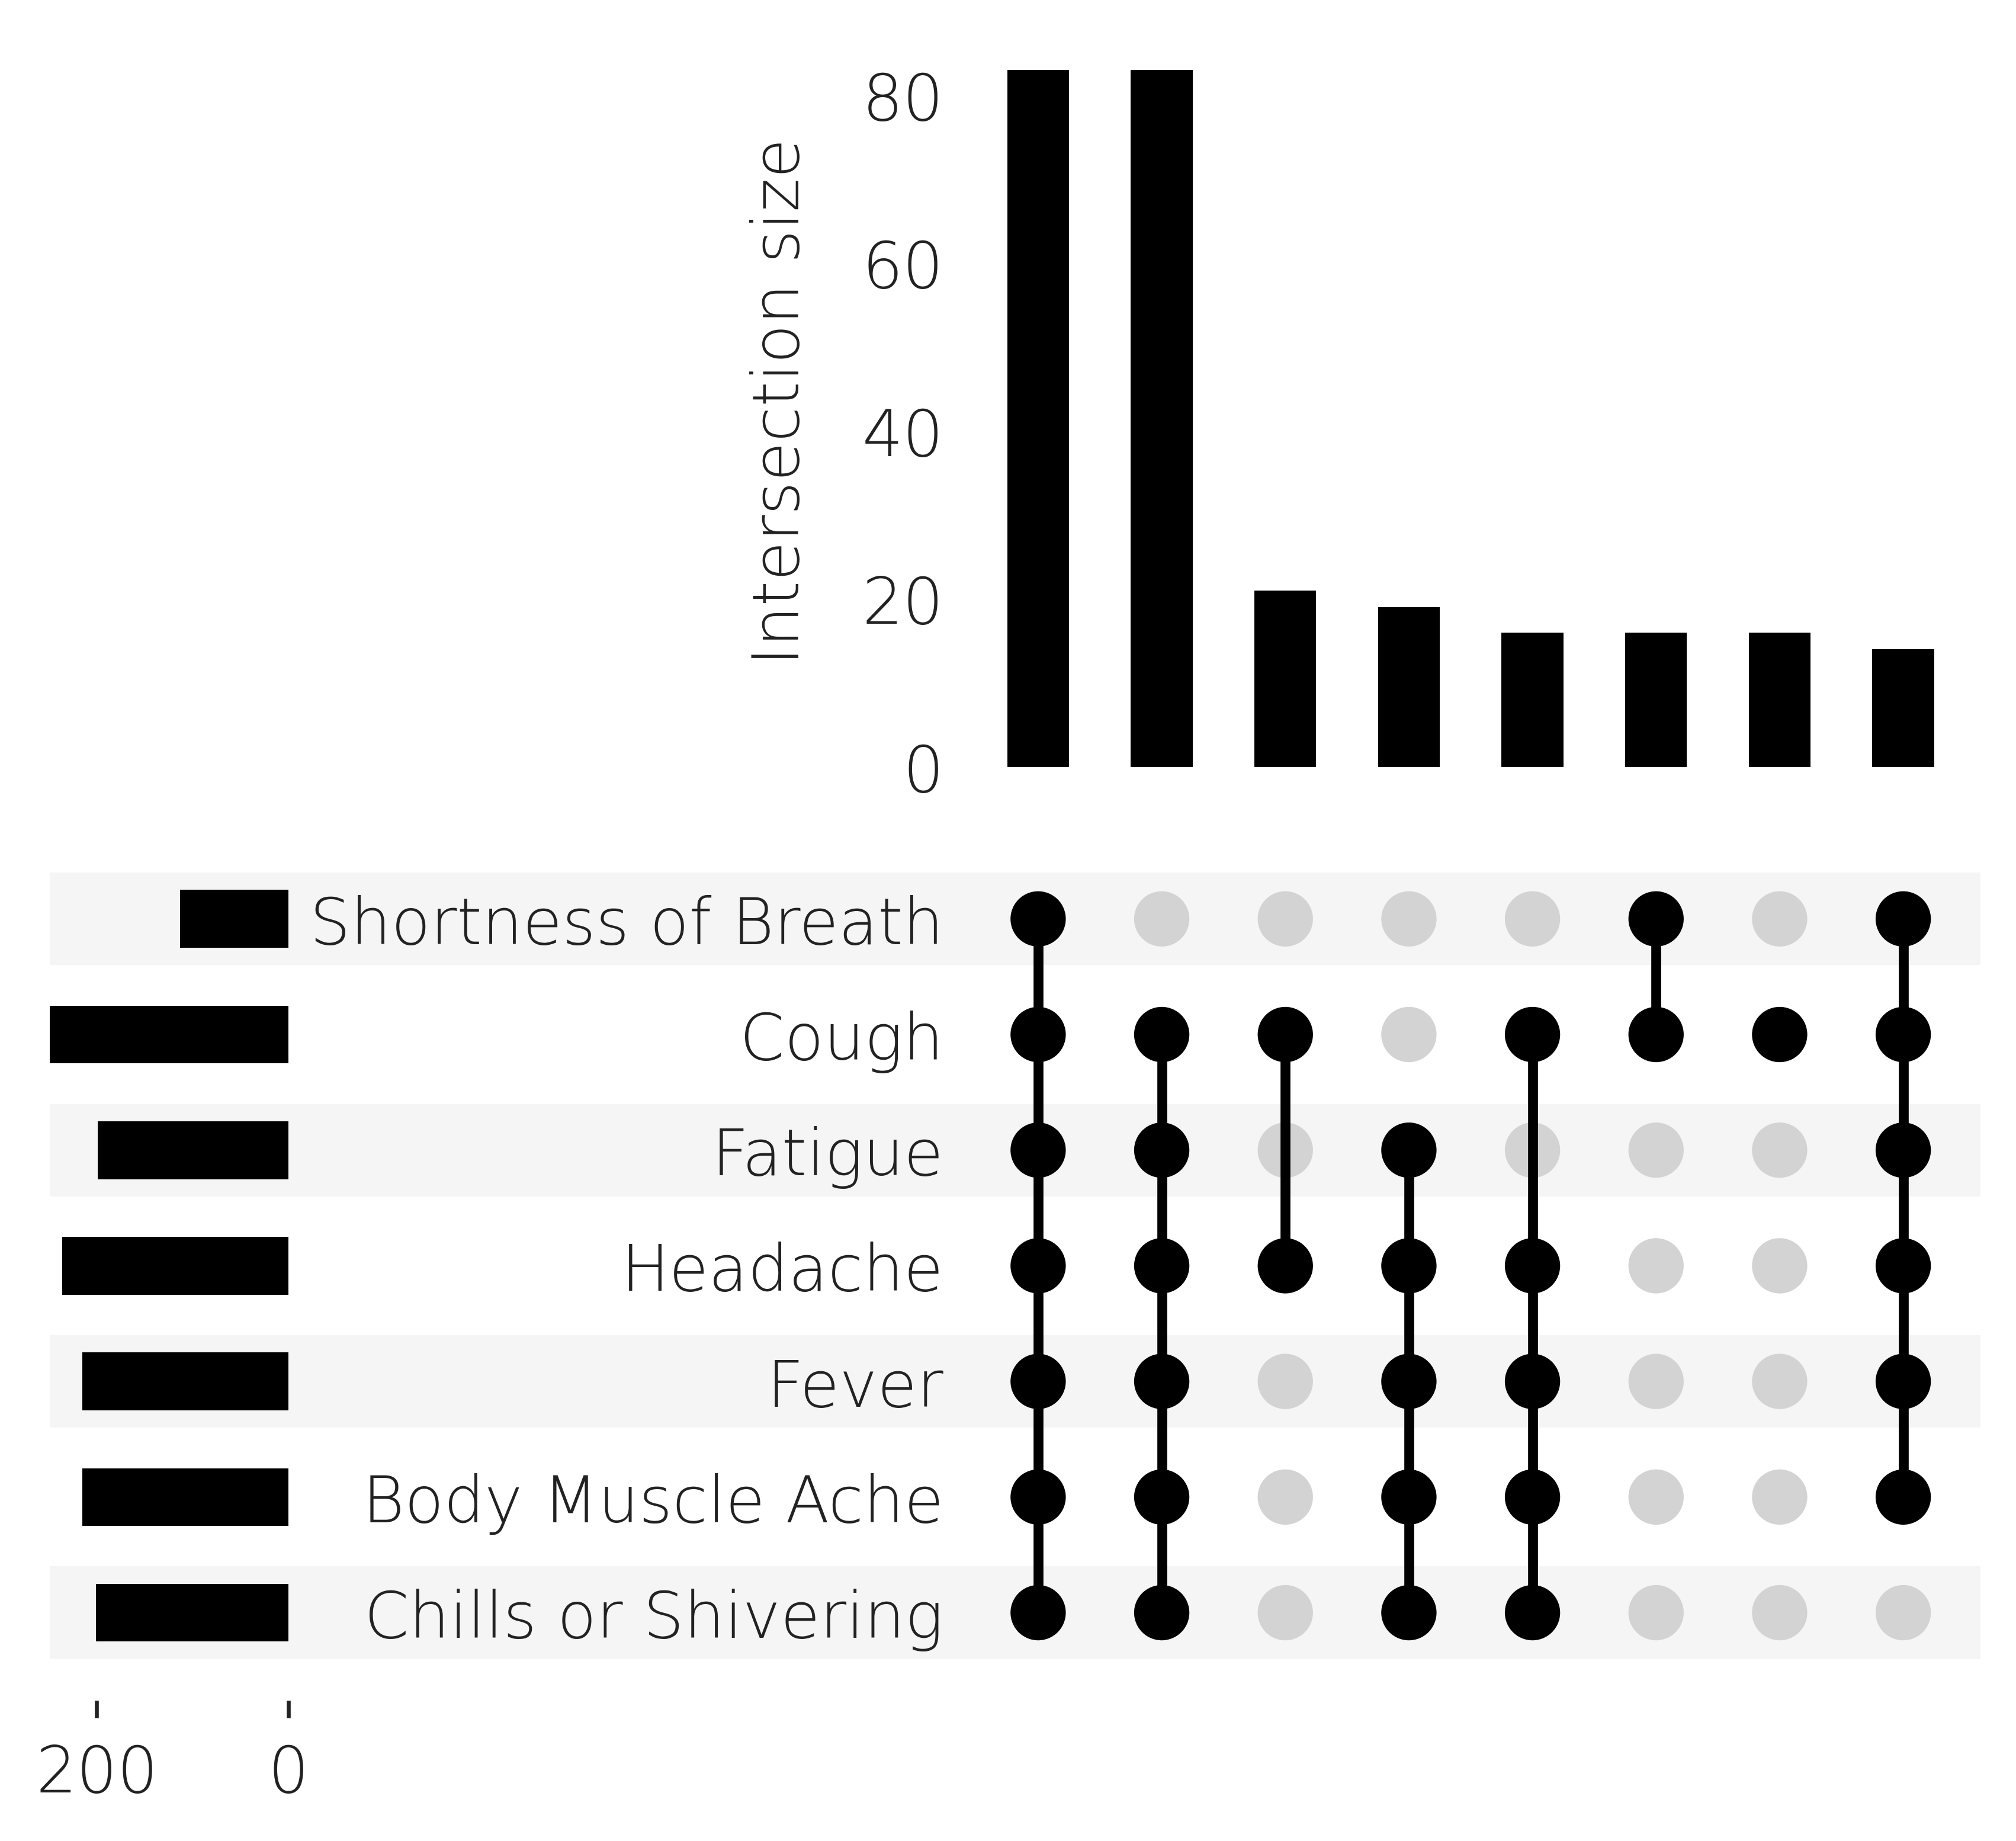

In [0]:
#create the upset plot
plt.rc('grid', lw=0)
upset_plot = up.plot(symptom_sets, sort_by='cardinality', sort_categories_by=None, subset_size='sum', sum_over='total', fig=plt.figure(figsize=(10,4), dpi=600))

display(upset_plot['matrix'])

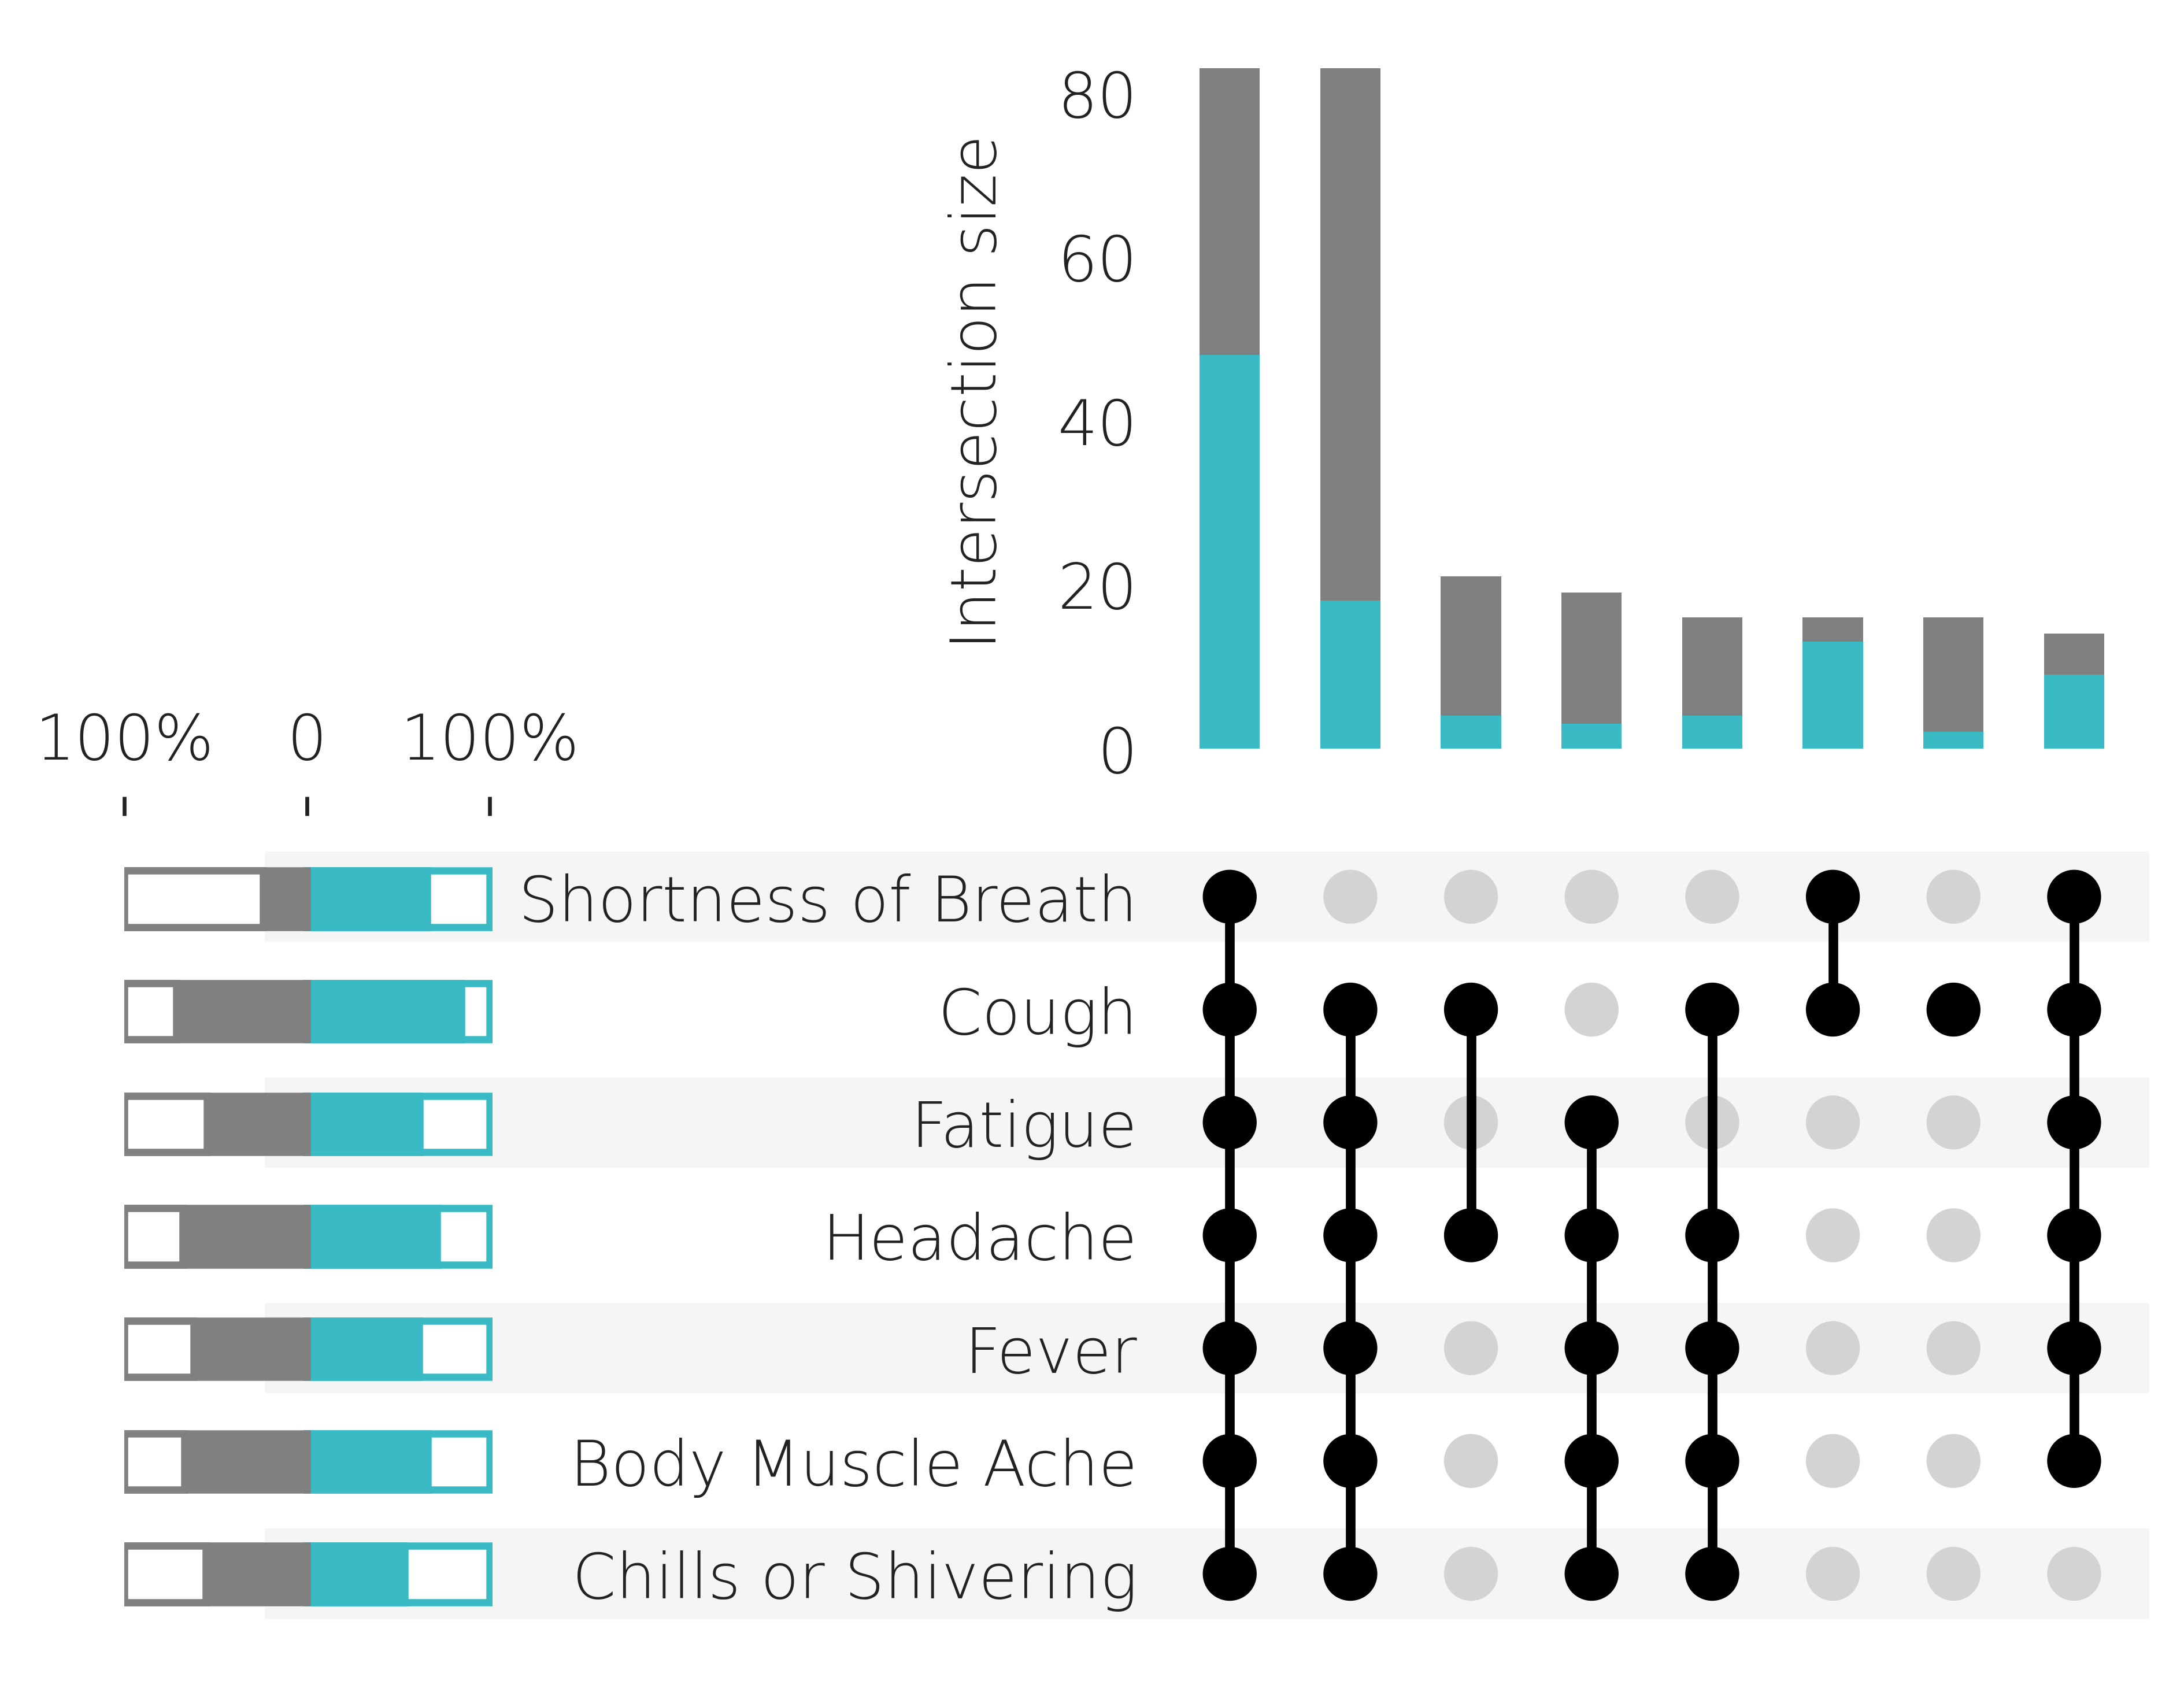

In [0]:
#modify & format the upset plot

#add in symptom counts for covid cases
upset_plot['intersections'].bar(np.arange(len(symptom_sets)), symptom_sets['total'].values, color='gray', zorder=99, width=0.5)
upset_plot['intersections'].bar(np.arange(len(symptom_sets)), symptom_sets['COVID-19'].values, color=eve_turquoise, zorder=100, width=0.5)

#change the symptom totals (left-hand bars) to relative totals for each cohort
upset_plot['totals'].barh(y=np.arange(len(symptom_order)), width=100, left=100, color='white', edgecolor=eve_turquoise, lw=1.5, height=0.5, zorder=101)
upset_plot['totals'].barh(y=np.arange(len(symptom_order)), width=symptom_counts.loc[symptom_order, 'covid_perc'].values, left=100, 
                          color=eve_turquoise, edgecolor=eve_turquoise, lw=1.5, height=0.5, zorder=101)
upset_plot['totals'].barh(y=np.arange(len(symptom_order)), width=100, left=0, color='gray', edgecolor='gray', lw=1.5, height=0.5, zorder=101)
upset_plot['totals'].barh(y=np.arange(len(symptom_order)), width=100-symptom_counts.loc[symptom_order, 'non_covid_perc'].values, left=0, 
                          color='white', edgecolor='gray', lw=1.5, height=0.5, zorder=101)
#change the limits of the bars and label
upset_plot['totals'].set_xlim(0,201.5)
upset_plot['totals'].xaxis.tick_top()
upset_plot['totals'].set_xticks([0,100,200])
upset_plot['totals'].set_xticklabels(['100%','0','100%'])
upset_plot['totals'].set_position([0.015, 0.07, 0.17, 0.42])

#upset_plot['totals'].set_aspect(200)
plt.tight_layout([-0.5, 0.0, 1, 1])

display(upset_plot['matrix'])

## Figure 3: Self-reported illness duration

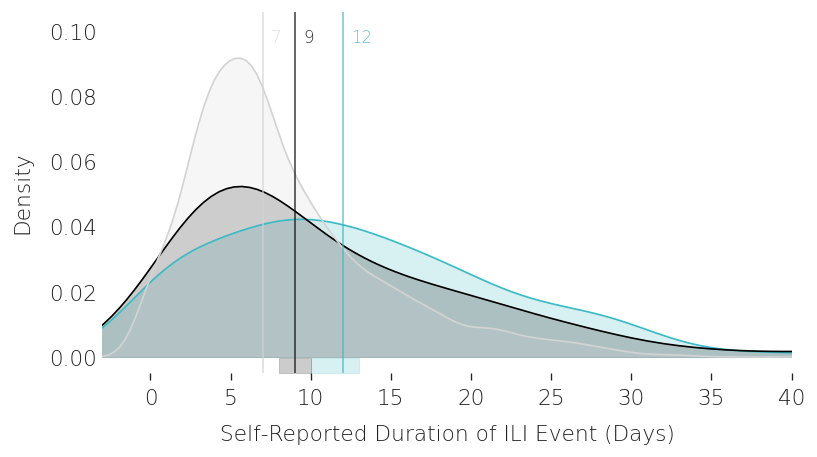

In [0]:
ili_events['illness_duration'] = (pd.to_datetime(ili_events['date_recovery_merged']) - pd.to_datetime(ili_events['date_onset_merged'])).dt.days

plt.figure(figsize=(7,4))

#NOTE: this is included for reproduction purposes, a comprable public plotting function is used in the cell below
ax = evp.multidistplot(a=ili_events['illness_duration'], 
                       hue=ili_events['cohort'], 
                       hue_order=['COVID-19','Non-COVID-19 Flu','Pre-COVID-19 Flu'],
                       palette=[eve_turquoise, 'black', 'lightgray'],
                       show_estimator_label=True, 
                       estimator=np.median, 
                       shade=True)
ax.yaxis.grid(False)
plt.xlim(-3,40)
ax.set_ylabel('Density')
ax.set_xlabel('Self-Reported Duration of ILI Event (Days)')

ax.legend_.remove()
plt.tight_layout()

display(ax)

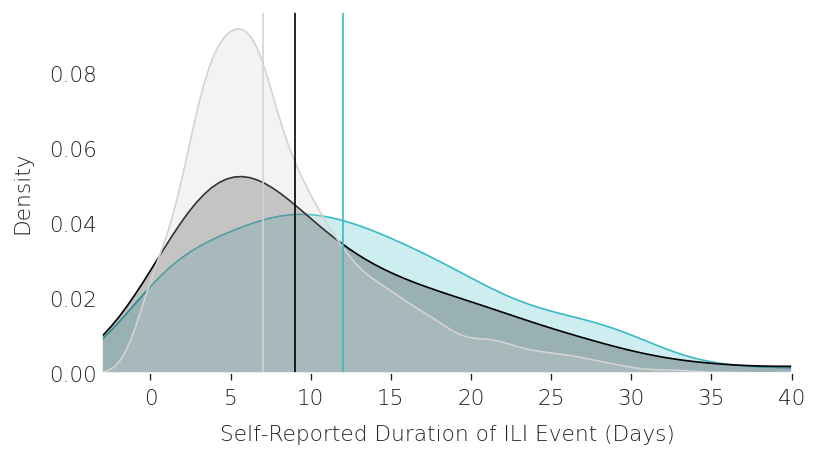

In [0]:
#create an additional plot that does not rely on internal plotting tools

plt.figure(figsize=(7,4))

for cohort, color in zip(['COVID-19','Non-COVID-19 Flu','Pre-COVID-19 Flu'], [eve_turquoise, 'black', 'lightgray']):
  
  ax = sns.kdeplot(x=ili_events.loc[ili_events['cohort']==cohort, 'illness_duration'], 
                   shade=True, color=color, linewidth=1)
  
  #plot line at median
  ax.axvline(x=ili_events.loc[ili_events['cohort']==cohort, 'illness_duration'].median(), color=color)
  
ax.yaxis.grid(False)
plt.xlim(-3,40)
ax.set_ylabel('Density')
ax.set_xlabel('Self-Reported Duration of ILI Event (Days)')

plt.tight_layout()

display(ax)

In [0]:
#test for differences in the ILI duration distributions
import scipy.stats as stats
from itertools import combinations

for cohort_A, cohort_B in combinations(ili_events['cohort'].unique(), 2):
  print('\n\nMann-Whitney results for ', cohort_A, ' vs.', cohort_B)
  print(stats.mannwhitneyu(ili_events.loc[ili_events['cohort']==cohort_A, 'illness_duration'], 
                           ili_events.loc[ili_events['cohort']==cohort_B, 'illness_duration'], 
                           alternative='two-sided'))

Mann-Whitney results for Pre-COVID-19 Flu vs. Non-COVID-19 Flu
MannwhitneyuResult(statistic=1109912.5, pvalue=4.744642855424786e-09)


Mann-Whitney results for Pre-COVID-19 Flu vs. COVID-19
MannwhitneyuResult(statistic=504127.0, pvalue=7.384517107730911e-15)


Mann-Whitney results for Non-COVID-19 Flu vs. COVID-19
MannwhitneyuResult(statistic=43893.0, pvalue=0.027640976509460815)

## Figure 4: Symptom prevalence over time

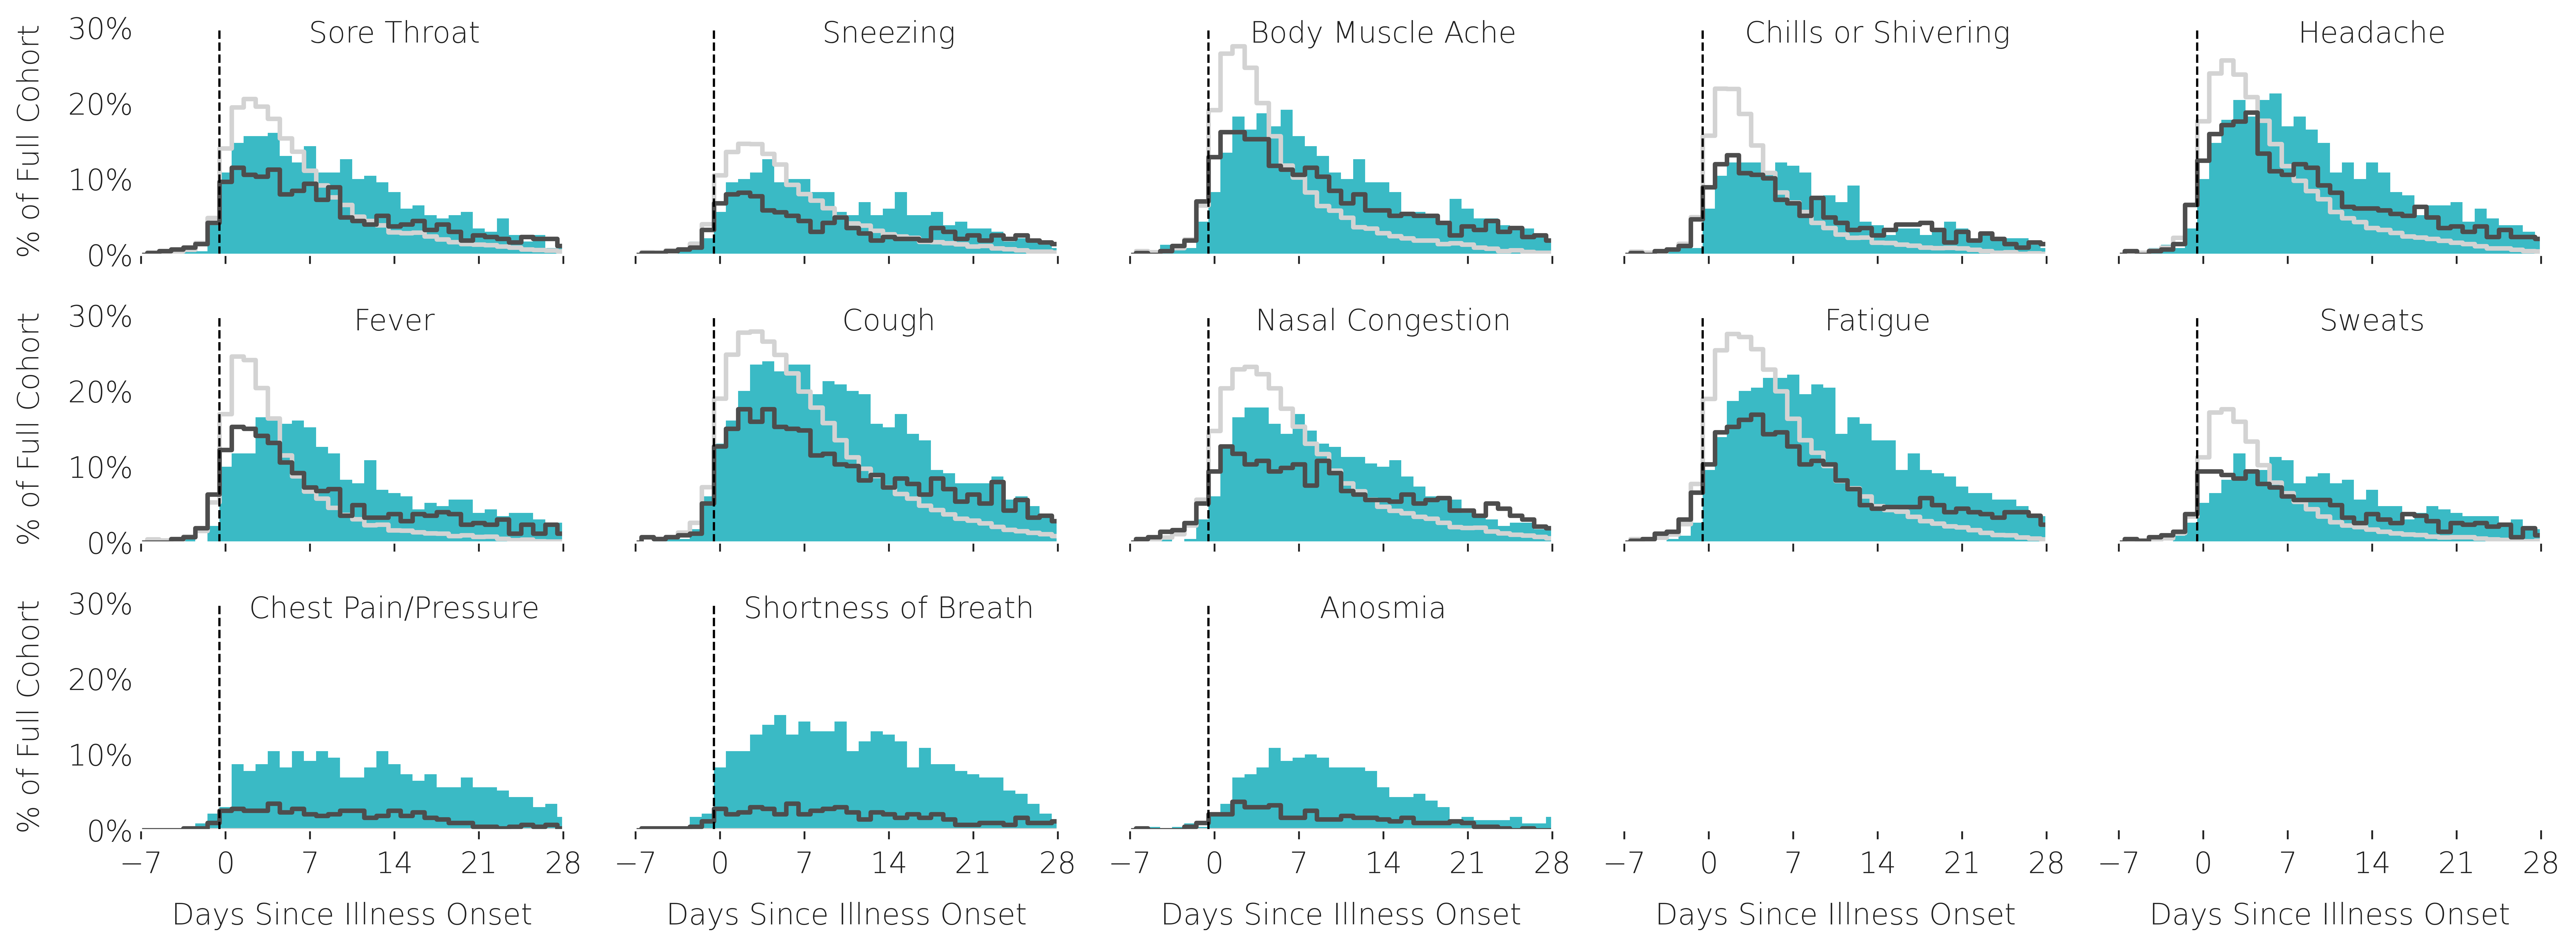

In [0]:
#create grid of plots and set axis limits
fig, axes = plt.subplots(3, 5, figsize=(16,6), dpi=600, sharex=True, sharey=True)
plt.ylim(0, 30)
plt.xlim(-7, 28)
plt.xticks(np.arange(-7,29,7))
plt.box(False)
fig.patch.set_facecolor('white')


#sort subplots by peak symptom occurance in covid cases (earliest to latest)
daily_symp_cols = ili_days.columns[ili_days.columns.str.startswith('daily_symp')]
daily_symp_cols = daily_symp_cols.drop('daily_symp__other')
symptom_order = (ili_days.loc[ili_days['cohort']=='COVID-19']
                          .groupby(by='days_since_symptoms_onset')[daily_symp_cols]
                          .sum()
                          .rolling(5)
                          .mean()
                          .idxmax()
                          .sort_values()
                          .index)

#since we're looking at % of the FULL cohorts that reported a symptom, zero-fill days with no survey coverage
ili_days[daily_symp_cols] = ili_days[daily_symp_cols].fillna(0)

#plot symptom prevalances by symptom day
for symptom, ax in zip(symptom_order, axes.flatten()):
  
  symptom_by_day = (ili_days.groupby(by=['cohort', 'days_since_symptoms_onset'])[symptom].mean()*100).fillna(0).unstack()
  
  for cohort, color in zip(['COVID-19', 'Pre-COVID-19 Flu', 'Non-COVID-19 Flu',], [eve_turquoise, 'lightgray', '0.3',]):
    
    #plot bars for the covid cohort
    if cohort == 'COVID-19':
      ax.bar(x=symptom_by_day.columns, height=symptom_by_day.loc[cohort].values, width=1, color=color)

    #plot traces otherwise
    else:
      ax.step(x=symptom_by_day.columns, y=symptom_by_day.loc[cohort].values, where='mid', color=color, lw='2')

  #add a line at illness onset
  ax.axvline(x=-0.5, ls='--', color='black')
  
  #add subtitles
  ax.text(x=14, y=28, s=symptom_map['symptoms__'+symptom.split('__')[-1]], horizontalalignment='center')
  
  #remove the grid lines
  ax.yaxis.grid(False)
  
  #ax.set_facecolor('white', alpha=0)


#label the x axis along the bottom row
for ax in axes[2,:]:
  ax.set_xlabel('Days Since Illness Onset')
  
#label the y axis along the left column
for ax in axes[:,0]:
  ax.set_ylabel('% of Full Cohort')
  ax.set_yticklabels([str(int(label))+'%' for label in ax.get_yticks()])

plt.tight_layout()
display(fig)